In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

# Load the full scan

In [254]:
fc = FileChooser('/sf/alvra/data/p19637/raw')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p19637/raw', filename='', title='HTML(value='', layout=Layout(display='none')…

In [256]:
quantile_corr = 0.5

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

#######################################################################################################33

(DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, 
 DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, 
 Izero_pump, Izero_unpump, correlation1, correlation2, Energy_eV, goodshots1, goodshots2) = XAS_scan_2diodes(fc.selected, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)


Processing: run0236-XAS_O_IDTBR2_2mgml_5ps
Step 74 of 74: Processing acq0074

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 4 / 4 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 500 pump and 500 unpump shots
(133,) shots out of (500,) survived
(126,) shots out of (500,) survived
Step 74 of 74: Processed acq0074
correlation Diode1 (all shots) = 0.9908832331342655
correlation Diode2 (all shots) = 0.9787201542070799


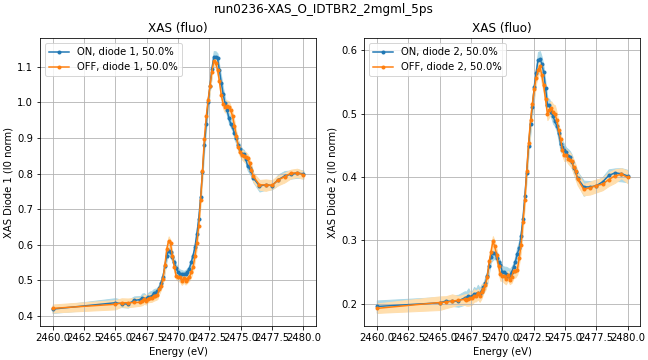

In [257]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-3], fontsize = 12)

#Pump_probe_relative = (DataFluo_pump - DataFluo_unpump) / DataFluo_unpump
XAS1_pump = DataDiode1_pump[:,0]
err1_low_pump = DataDiode1_pump[:,1]
err1_high_pump = DataDiode1_pump[:,2]
XAS1_unpump = DataDiode1_unpump[:,0]
err1_low_unpump = DataDiode1_unpump[:,1]
err1_high_unpump = DataDiode1_unpump[:,2]
XAS1_pump_probe = Pump_probe_Diode1[:,0]
err1_low_pump_probe = Pump_probe_Diode1[:,1]
err1_high_pump_probe = Pump_probe_Diode1[:,2]

XAS2_pump = DataDiode2_pump[:,0]
err2_low_pump = DataDiode2_pump[:,1]
err2_high_pump = DataDiode2_pump[:,2]
XAS2_unpump = DataDiode2_unpump[:,0]
err2_low_unpump = DataDiode2_unpump[:,1]
err2_high_unpump = DataDiode2_unpump[:,2]
XAS2_pump_probe = Pump_probe_Diode2[:,0]
err2_low_pump_probe = Pump_probe_Diode2[:,1]
err2_high_pump_probe = Pump_probe_Diode2[:,2]

# plt.subplot(1,22,1)
ax1.plot(Energy_eV, XAS1_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_pump, err1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS1_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_unpump, err1_high_unpump, color='navajowhite')
#ax1.set_ylim(0.7,1.5)

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS2_pump, label='ON, diode 2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_pump, err2_high_pump, color='lightblue')

ax2.plot(Energy_eV, XAS2_unpump, label='OFF, diode 2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_unpump, err2_high_unpump, color='navajowhite')
#ax2.set_ylim(0.8,1.5)
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("XAS Diode 2 (I0 norm)")
ax2.set_title('XAS (fluo)')
ax2.legend(loc="best")
ax2.grid()

plt.show()
#plt.savefig('/das/work/p18/p18387/exported_data/L-cystine_XAS.png')


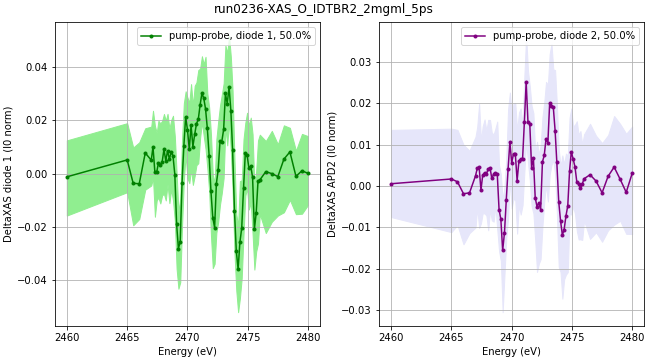

In [258]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-3], fontsize = 12)

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS1_pump_probe, label='pump-probe, diode 1, {}%'.format(quantile_corr*100),color='green', marker='.')
ax1.fill_between(Energy_eV,err1_low_pump_probe, err1_high_pump_probe, color='lightgreen')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("DeltaXAS diode 1 (I0 norm)")
ax1.set_title('')
ax1.legend(loc="best")
#ax1.set_ylim(-0.1,0.13)
ax1.grid()
# plt.tight_layout()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS2_pump_probe, label='pump-probe, diode 2, {}%'.format(quantile_corr*100),color='purple', marker='.')
ax2.fill_between(Energy_eV,err2_low_pump_probe, err2_high_pump_probe, color='lavender')
#ax2.set_ylim(-0.08,0.1)

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("DeltaXAS APD2 (I0 norm)")
ax2.set_title('')
ax2.legend(loc="best")
ax2.grid()
# plt.tight_layout()


plt.show()


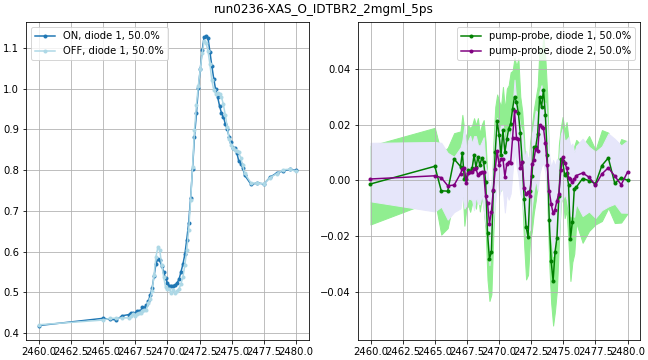

In [259]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-3], fontsize = 12)

ax1.plot(Energy_eV, XAS1_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.plot(Energy_eV, XAS1_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.', color='lightblue')

#ax1.plot(Energy_eV, XAS2_pump, label='ON, diode 2, {}%'.format(quantile_corr*100),marker='.')
#ax1.plot(Energy_eV, XAS2_unpump, label='OFF, diode 2, {}%'.format(quantile_corr*100),marker='.', color='navajowhite')

ax1.legend(loc="best")

ax1.grid()
#ax1.set_ylim(0.7,1.5)


ax2.plot(Energy_eV, XAS1_pump_probe, label='pump-probe, diode 1, {}%'.format(quantile_corr*100), color='green', marker='.')
ax2.fill_between(Energy_eV,err1_low_pump_probe, err1_high_pump_probe, color='lightgreen')
ax2.plot(Energy_eV, XAS2_pump_probe, label='pump-probe, diode 2, {}%'.format(quantile_corr*100), color='purple', marker='.')
ax2.fill_between(Energy_eV,err2_low_pump_probe, err2_high_pump_probe, color='lavender')
ax2.legend(loc="best")
ax2.grid()
#ax2.set_ylim(-0.06,0.1)


#ax1.axvline(7123.5)
#ax1.axvline(7135)
# ax1.axvline(6565)
# #ax1.axvline(6552)
#ax2.axvline(7123.5)
# ax2.axvline(6558)
# ax2.axvline(6565)
#ax2.axvline(6552)

plt.show()


In [230]:
with open(fc.selected) as json_file:
    data = json.load(json_file)
    En = np.array(data['scan_values']).ravel()

## Error Bars

In [260]:
#### CH1 ####
XAS1_pump      = DataDiode1_pump[:,0]
err1_low_pump  = (DataDiode1_pump[:,1]-DataDiode1_pump[:,0])/np.sqrt(goodshots1)
err1_high_pump = (DataDiode1_pump[:,2]-DataDiode1_pump[:,0])/np.sqrt(goodshots1)

XAS1_unpump      = DataDiode1_unpump[:,0]
err1_low_unpump  = (DataDiode1_unpump[:,1]-DataDiode1_unpump[:,0])/np.sqrt(goodshots1)
err1_high_unpump = (DataDiode1_unpump[:,2]-DataDiode1_unpump[:,0])/np.sqrt(goodshots1)

XAS1_pump_probe       = Pump_probe_Diode1[:,0]
err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)

#### CH2 ####
XAS2_pump        = DataDiode2_pump[:,0]
err2_low_pump    = (DataDiode2_pump[:,1]-DataDiode2_pump[:,0])/np.sqrt(goodshots2)
err2_high_pump   = (DataDiode2_pump[:,2]-DataDiode2_pump[:,0])/np.sqrt(goodshots2)

XAS2_unpump      = DataDiode2_unpump[:,0]
err2_low_unpump  = (DataDiode2_unpump[:,1]-DataDiode2_unpump[:,0])/np.sqrt(goodshots2)
err2_high_unpump = (DataDiode2_unpump[:,2]-DataDiode2_unpump[:,0])/np.sqrt(goodshots2)

XAS2_pump_probe       = Pump_probe_Diode2[:,0]
err2_low_pump_probe   = np.sqrt(err2_low_pump**2  + err2_low_unpump**2)
err2_high_pump_probe  = np.sqrt(err2_high_pump**2 + err2_high_unpump**2)


## Averaging 2 Diodes

In [261]:
XAS_mean_pump = (XAS1_pump+XAS2_pump)/2
XAS_mean_unpump = (XAS1_unpump+XAS2_unpump)/2

ave_unpump = (XAS1_unpump-XAS1_unpump[0] + XAS2_unpump-XAS2_unpump[0])/2
ave_unpump_err_l = np.sqrt(err1_low_unpump**2+err2_low_unpump**2)
ave_unpump_err_h = np.sqrt(err1_high_unpump**2+err1_high_unpump**2)

ave_pump = (XAS1_pump-XAS1_pump[0] + XAS2_pump-XAS2_pump[0])/2
ave_pump_err_l = np.sqrt(err1_low_pump**2+err2_low_pump**2)
ave_pump_err_h = np.sqrt(err1_high_pump**2+err1_high_pump**2)

##Average first, subtract later
ave_pp1 = ave_pump - ave_unpump
#ave_pp_err1 = np.sqrt((ave_unpump_err_h-ave_unpump_err_l)**2+np.square(ave_pump_err_h-ave_pump_err_l)**2)
ave_pp_err_l1 = np.sqrt(ave_unpump_err_l**2+ave_pump_err_l**2)
ave_pp_err_h1 = np.sqrt(ave_unpump_err_h**2+ave_pump_err_h**2)

##Average of the difference signals
factor = 1
ave_pp2 = (XAS1_pump_probe*factor + XAS2_pump_probe*factor)/2
ave_pp_err_l2 = ((err1_low_pump_probe + err2_low_pump_probe)/2)*factor
ave_pp_err_h2 = ((err1_high_pump_probe + err2_high_pump_probe)/2)*factor

## Plotting Averged Diodes with error bars

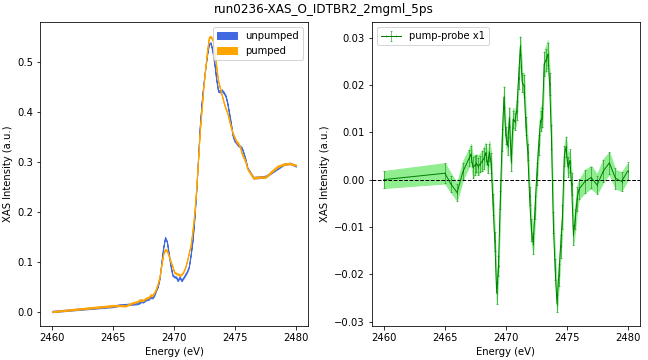

In [263]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-3], fontsize = 12)


# ax1.axes.errorbar(Energy_eV,ave_unpump, ave_unpump_err_l ,ave_unpump_err_h, 
#              lw=1,marker='o',markersize=3,capsize=2,label='unpumped')
# ax1.axes.errorbar(Energy_eV, ave_pump,  ave_pump_err_l,  ave_pump_err_h, 
#              lw=1,marker='o',markersize=3,capsize=2,label='pumped')

#ax1.plot(Energy_eV,ave_unpump,lw=1,marker='o',markersize=3,label='unpumped')
ax1.fill_between(Energy_eV,ave_unpump-ave_unpump_err_l, ave_unpump+ave_unpump_err_h,color='royalblue',label='unpumped')
ax1.fill_between(Energy_eV,ave_pump-ave_pump_err_l, ave_pump+ave_pump_err_h,color='orange',label='pumped')


ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('XAS Intensity (a.u.)')
ax1.legend()
#ax1.set_xlim(7110,7150)

## Difference of the Averages (probably more correct)
ax2.axes.errorbar(Energy_eV, ave_pp1, ave_pp_err_l1, ave_pp_err_h1, 
             lw=1,color='green', markersize=0,capsize=1,capthick=0.5,
                  ecolor='green',elinewidth=0.5,label='pump-probe x{}'.format(factor))
#ax2.plot(Energy_eV,ave_pp1,lw=1,marker='o',markersize=3,color='green',label='unpumped')
ax2.fill_between(Energy_eV,ave_pp1-ave_pp_err_l1, ave_pp1+ave_pp_err_h1,color='lightgreen')


ax2.axhline(0,ls='--',c='k',lw=1)
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('XAS Intensity (a.u.)')
ax2.legend()
#ax2.set_xlim(2471,2475)


## Average of the differences
# ax2.axes.errorbar(Energy_eV, ave_pp2, ave_pp_err_l2, ave_pp_err_h2, 
#              lw=1,marker='o', markersize=2,capsize=2,label='pump-probe x{}'.format(factor))
# ax2.axhline(0,ls='--',c='k',lw=1)
# ax2.set_xlabel('Energy (eV)')
# ax2.set_ylabel('XAS Intensity (a.u.)')
# ax2.legend()
# ax2.set_ylim(-0.03,0.1)


In [234]:
reducedir = '../Claudio/Reduced/'
os.makedirs(reducedir, exist_ok=True)
run_name = fc.selected.split('/')[-3]

title = 'Energy (eV), pumpprobe, error_low, error_high'
array = np.transpose(np.array([Energy_eV, 
                               ave_pp1, ave_pp_err_l1, ave_pp_err_h1, 
                              ]))
np.savetxt(reducedir+run_name+'.txt', array, header=title)

In [236]:
datafiles = []
for file in glob('/das/work/p19/p19637/Claudio/Reduced/*XAS*.txt'):
    datafiles.append(file)
datafiles = sorted(datafiles)#, key = os.path.getmtime)
patch = datafiles[-5:]
patch

['/das/work/p19/p19637/Claudio/Reduced/run0169-XAS_O_IDTBR_1ps_2mgml.txt',
 '/das/work/p19/p19637/Claudio/Reduced/run0190-XAS_O_IDTBR_10ns_2mgml.txt',
 '/das/work/p19/p19637/Claudio/Reduced/run0191-XAS_O_IDTBR_1ps_2mgml.txt',
 '/das/work/p19/p19637/Claudio/Reduced/run0192-XAS_O_IDTBR_1ps_2mgml.txt',
 '/das/work/p19/p19637/Claudio/Reduced/run0196-XAS_O_IDTBR2_1ps_2mgml.txt']

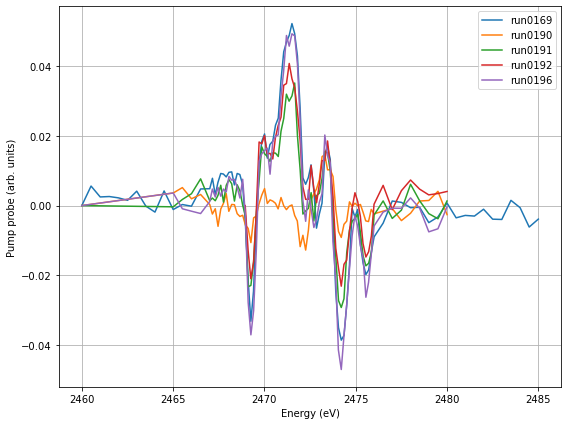

<Figure size 432x288 with 0 Axes>

In [240]:

plt.figure(figsize=(9,7))
for index in range(len(patch)):
    label = patch[index].split('/')[-1]
    En = np.transpose(np.genfromtxt(patch[index]))[0]
    Int = np.transpose(np.genfromtxt(patch[index]))[1]
    plt.plot(En, Int, label = label.split('-')[0])#[1].split('_')[-1])
plt.legend(loc='best')
plt.xlabel('Energy (eV)')
plt.ylabel('Pump probe (arb. units)')
plt.grid()
plt.show()
plt.tight_layout()

## Check correlation for a certain energy point

### For a single diode, ON & OFF

In [69]:
chosen_energy = 2473

detector_XAS = channel_diode_1
detector_Izero = channel_Izero122

quantile_corr = 0.3
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

print ('Energy = {} eV'.format(Energy_eV[index_energy]))

(48,) shots out of (498,) survived
Correlation (all shots)      = 0.9960356498939114
Correlation (filtered shots) = 0.9997892310177592
Energy = 2473.009812904423 eV


In [70]:
from scipy import stats
#m,b = np.polyfit(Izero_pump,Fluo_pump, 1)
#m_filter,b_filter = np.polyfit(Izero_pump_filter,Fluo_pump_filter, 1)
m_median = np.median(Fluo_pump/Izero_pump)
m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)
print ("Median (all) = {}, Median (filtered) = {}".format(m_median, m_median_filter))

MAD = stats.median_absolute_deviation(Fluo_pump/Izero_pump)
MAD_filter = stats.median_absolute_deviation(Fluo_pump_filter/Izero_pump_filter)

print ("MAD (all) = {}, MAD(filtered) = {}".format(MAD, MAD_filter))

print ("MAD/median (all) = {}%, MAD/median (filtered) = {}%".format(MAD/m_median*100, MAD_filter/m_median_filter*100))

Median (all) = 1.3260439578983316, Median (filtered) = 1.3247869464405788
MAD (all) = 0.04657520226086725, MAD(filtered) = 0.011774806536436429
MAD/median (all) = 3.512342255582917%, MAD/median (filtered) = 0.888807560194704%


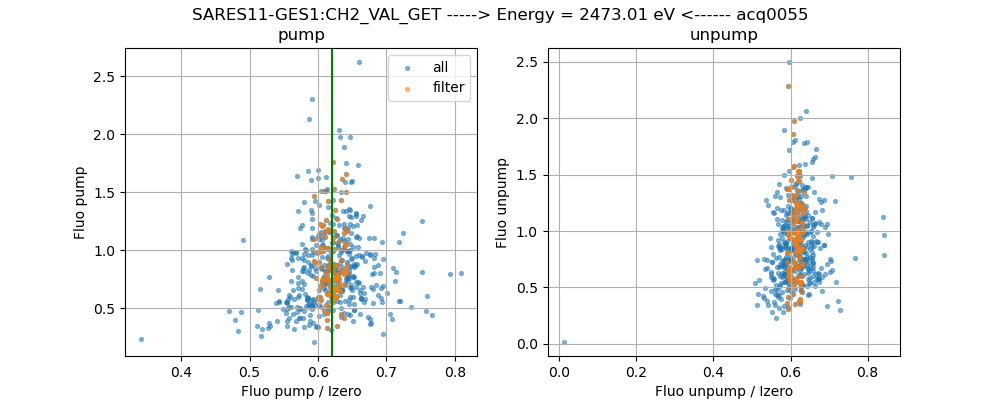

In [76]:
plt.figure(figsize=(10,4))
plt.suptitle('{} -----> Energy = {:.2f} eV <------ {}'.format(detector_XAS,Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))
plt.subplot(121)
plt.title('pump')
plt.scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
plt.scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
plt.axvline(x=m_median_filter, color = 'green')
plt.legend(loc='best')
plt.xlabel('Fluo pump / Izero')
plt.ylabel('Fluo pump')
plt.grid()


plt.subplot(122)
plt.title('unpump')
plt.scatter(Fluo_unpump/Izero_unpump, Fluo_unpump, s=8, alpha = 0.5,  label = 'all')
plt.scatter(Fluo_unpump_filter/Izero_unpump_filter, Fluo_unpump_filter, s=8, alpha = 0.5, label='filter')
plt.xlabel('Fluo unpump / Izero')
plt.ylabel('Fluo unpump')
plt.grid()
plt.show()

### For 2 diodes, (only ON)

(122,) shots out of (498,) survived


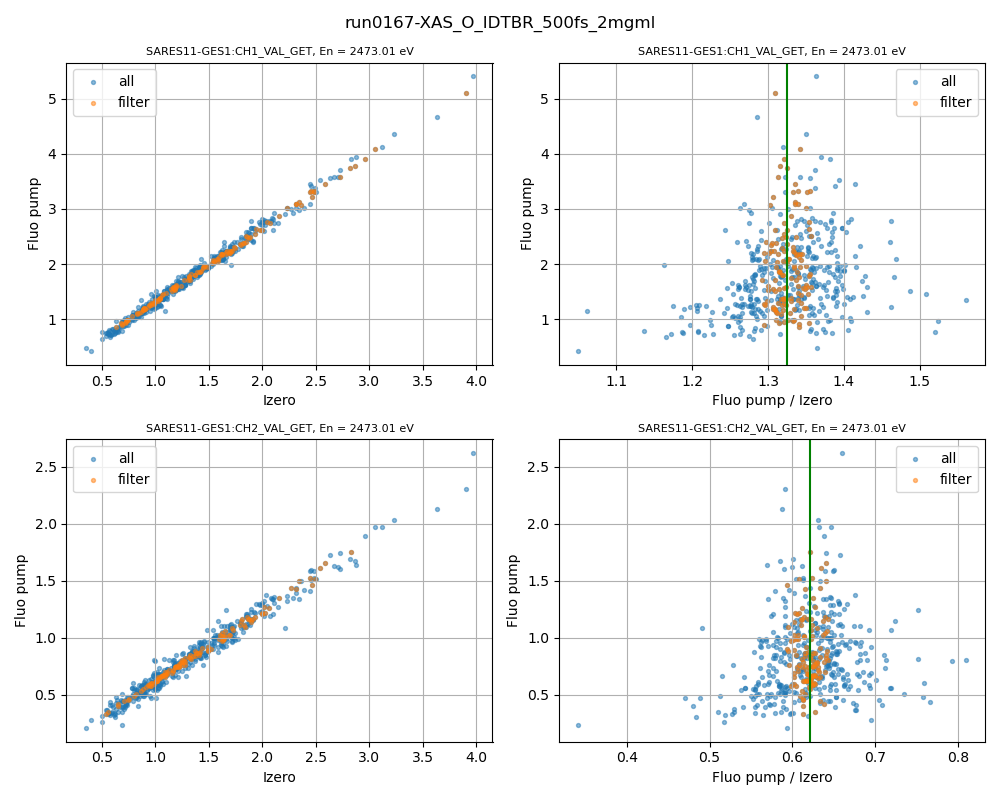

In [74]:
chosen_energy = 2473

detector_XAS = channel_diode_1
detector_Izero = channel_Izero122

quantile_corr = 0.5
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

fig,ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle(fc.selected.split('/')[-3], fontsize = 12)

ax[0][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][0].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[0][0].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][0].legend(loc='best')
ax[0][0].set_xlabel('Izero')
ax[0][0].set_ylabel('Fluo pump')
ax[0][0].grid()

m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)

ax[0][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][1].scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[0][1].scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][1].legend(loc='best')
ax[0][1].set_xlabel('Fluo pump / Izero')
ax[0][1].set_ylabel('Fluo pump')
ax[0][1].axvline(x=m_median_filter, color = 'green')
ax[0][1].grid()

#################################################################

detector_XAS = channel_diode_2
detector_Izero = channel_Izero122

#################################################################
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

ax[1][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][0].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[1][0].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[1][0].legend(loc='best')
ax[1][0].set_xlabel('Izero')
ax[1][0].set_ylabel('Fluo pump')
ax[1][0].grid()

m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)

ax[1][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][1].scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[1][1].scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[1][1].legend(loc='best')
ax[1][1].set_xlabel('Fluo pump / Izero')
ax[1][1].set_ylabel('Fluo pump')
ax[1][1].axvline(x=m_median_filter, color = 'green')
ax[1][1].grid()

plt.tight_layout()

In [75]:
m_median = np.median(Fluo_pump/Izero_pump)
m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)
print ("Median (all) = {}, Median (filtered) = {}".format(m_median, m_median_filter))

MAD = stats.median_absolute_deviation(Fluo_pump/Izero_pump)
MAD_filter = stats.median_absolute_deviation(Fluo_pump_filter/Izero_pump_filter)

print ("MAD (all) = {}, MAD(filtered) = {}".format(MAD, MAD_filter))

print ("MAD/median (all) = {}%, MAD/median (filtered) = {}%".format(MAD/m_median*100, MAD_filter/m_median_filter*100))

Median (all) = 0.6208092844804625, Median (filtered) = 0.6208154807251484
MAD (all) = 0.03658945204227278, MAD(filtered) = 0.013153004966098765
MAD/median (all) = 5.893831319371044%, MAD/median (filtered) = 2.118665750850042%


In [50]:
np.sqrt((50*2.355)**2 + 30**2 + 70**2 + 50**2)

148.87935551983023

## Load files in a loop

In [8]:
datafiles = []
for file in glob('/sf/alvra/data/p19506/raw/scan_info/*_XAS_ZnO_com_80ps_*'):
    datafiles.append(file)
datafiles = sorted(datafiles, key = os.path.getmtime)
patch = datafiles[:2]
patch

['/sf/alvra/data/p19506/raw/scan_info/043_XAS_ZnO_com_80ps_1.json',
 '/sf/alvra/data/p19506/raw/scan_info/044_XAS_ZnO_com_80ps_0.json']

In [9]:
quantile_corr = 0.4

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero117

#######################################################################################################33
from sfdata import SFScanInfo
import itertools

DataDiode1_pump_all = []
DataDiode1_unpump_all = []
Pump_probe1_all = []

DataDiode2_pump_all = []
DataDiode2_unpump_all = []
Pump_probe2_all = []

for json_file in patch:
    scan = SFScanInfo(json_file)
    Energy_eV = scan.readbacks
        
    DataDiode1_pump = []
    DataDiode1_unpump = []
    Pump_probe_Diode1 = []
    
    DataDiode2_pump = []
    DataDiode2_unpump = []
    Pump_probe_Diode2 = []
    
    (DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, 
     DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, _, _, _, _, 
     Energy_eV) = XAS_scan_2diodes(json_file, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)
        
    DataDiode1_pump_all.append(DataDiode1_pump)
    DataDiode1_unpump_all.append(DataDiode1_unpump)
    Pump_probe1_all.append(Pump_probe_Diode1)    
    
    DataDiode2_pump_all.append(DataDiode2_pump)
    DataDiode2_unpump_all.append(DataDiode2_unpump)
    Pump_probe2_all.append(Pump_probe_Diode2) 
    
DataDiode1_pump_all = np.array(DataDiode1_pump_all)
DataDiode1_unpump_all = np.array(DataDiode1_unpump_all)
Pump_probe1_all = np.array(Pump_probe1_all)
DataDiode2_pump_all = np.array(DataDiode2_pump_all)
DataDiode2_unpump_all = np.array(DataDiode2_unpump_all)
Pump_probe2_all = np.array(Pump_probe2_all)


/sf/alvra/data/p19506/raw/scan_info/044_XAS_ZnO_com_80ps_0.json

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY  999 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 999 / 1002 -> 0% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 498 pump and 498 unpump shots
(81,) shots out of (498,) survived
(78,) shots out of (498,) survived
Step 65 of 65: Processed run_003418
correlation Diode1 (all shots) = 0.9687411353498918
correlation Diode2 (all shots) = 0.9726016650173293


<IPython.core.display.Javascript object>


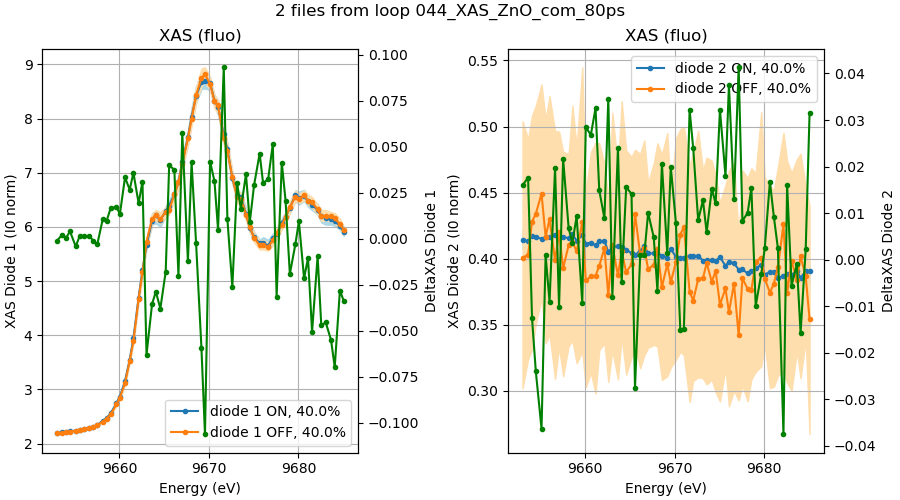

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle('{} files from loop {}'.format(len(patch), json_file.split('/')[-1][:-7]))

XAS1_pump = np.mean(DataDiode1_pump_all, axis=0)[:,0]
err1_low_pump = np.mean(DataDiode1_pump_all, axis=0)[:,1]
err1_high_pump = np.mean(DataDiode1_pump_all, axis=0)[:,2]
XAS1_unpump = np.mean(DataDiode1_unpump_all, axis=0)[:,0]
err1_low_unpump = np.mean(DataDiode1_unpump_all, axis=0)[:,1]
err1_high_unpump = np.mean(DataDiode1_unpump_all, axis =0)[:,2]
XAS1_pump_probe = np.mean(Pump_probe1_all, axis=0)[:,0]
err1_low_pump_probe = np.mean(Pump_probe1_all, axis=0)[:,1]
err1_high_pump_probe = np.mean(Pump_probe1_all, axis=0)[:,2]

XAS2_pump = np.mean(DataDiode2_pump_all, axis=0)[:,0]
err2_low_pump = np.mean(DataDiode2_pump_all, axis=0)[:,1]
err2_high_pump = np.mean(DataDiode2_pump_all, axis=0)[:,2]
XAS2_unpump = np.mean(DataDiode2_unpump_all, axis=0)[:,0]
err2_low_unpump = np.mean(DataDiode2_unpump_all, axis=0)[:,1]
err2_high_unpump = np.mean(DataDiode2_unpump_all, axis =0)[:,2]
XAS2_pump_probe = np.mean(Pump_probe2_all, axis=0)[:,0]
err2_low_pump_probe = np.mean(Pump_probe2_all, axis=0)[:,1]
err2_high_pump_probe = np.mean(Pump_probe2_all, axis=0)[:,2]


ax3 = ax1.twinx()

ax1.plot(Energy_eV, XAS1_pump, label='diode 1 ON, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_pump, err1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS1_unpump, label='diode 1 OFF, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_unpump, err1_high_unpump, color='navajowhite')

ax3.plot(Energy_eV, XAS1_pump_probe, label='diode 1 pp, {}%'.format(quantile_corr*100),marker='.', color='g')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax3.set_ylabel ("DeltaXAS Diode 1")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax4 = ax2.twinx()

ax2.plot(Energy_eV, XAS2_pump, label='diode 2 ON, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_pump, err2_high_pump, color='lightblue')

ax2.plot(Energy_eV, XAS2_unpump, label='diode 2 OFF, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_unpump, err2_high_unpump, color='navajowhite')

ax4.plot(Energy_eV, XAS2_pump_probe, label='diode 2 pp, {}%'.format(quantile_corr*100),marker='.', color='g')

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("XAS Diode 2 (I0 norm)")
ax4.set_ylabel ("DeltaXAS Diode 2")
ax2.set_title('XAS (fluo)')
ax2.legend(loc="best")
ax2.grid()

#ax1.legend(loc='best')
#ax2.legend(loc='lower right')
#ax1.set_xlabel('Energy (eV)')
#ax1.set_ylabel('XAS norm')
#ax2.set_ylabel('difference')
#ax1.grid()
plt.show()

## cell to export data

In [ ]:
import pandas as pd
DIR_save = "/das/work/p18/p18956/UserFolder/"
file2save = DIR_save + scan_name + ".txt"
pd.DataFrame({
    'Energy_eV' : Energy_eV,
    'pump_probe': Pump_probe,
    'signal_on' : DataFluo_pump,
    'signal_off' : DataFluo_unpump,
}).to_csv(file2save,index=False)